In [1]:
import pandas as pd
import numpy as np

import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, recall_score, accuracy_score, precision_score
RANDOM_SEED = 2021 
TEST_PCT = 0.3
LABELS = ["Normal","Fraud"]

In [3]:
dataset = pd.read_csv("creditcard.csv")
print(list(dataset.columns))
dataset.describe()

['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [4]:
#check for any  nullvalues 
print("Any nulls in the dataset ",dataset.isnull().values.any() )
print('-------')
print("No. of unique labels ", len(dataset['Class'].unique()))
print("Label values ",dataset.Class.unique())
#0 is for normal credit card transaction
#1 is for fraudulent credit card transaction
print('-------')
print("Break down of the Normal and Fraud Transactions")
print(pd.value_counts(dataset['Class'], sort = True) )

Any nulls in the dataset  False
-------
No. of unique labels  2
Label values  [0 1]
-------
Break down of the Normal and Fraud Transactions
Class
0    284315
1       492
Name: count, dtype: int64


C:\Users\ASUS Vivobook\AppData\Local\Temp\ipykernel_18460\2454488302.py:10: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  print(pd.value_counts(dataset['Class'], sort = True) )


C:\Users\ASUS Vivobook\AppData\Local\Temp\ipykernel_18460\3399164077.py:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  count_classes = pd.value_counts(dataset['Class'], sort = True)


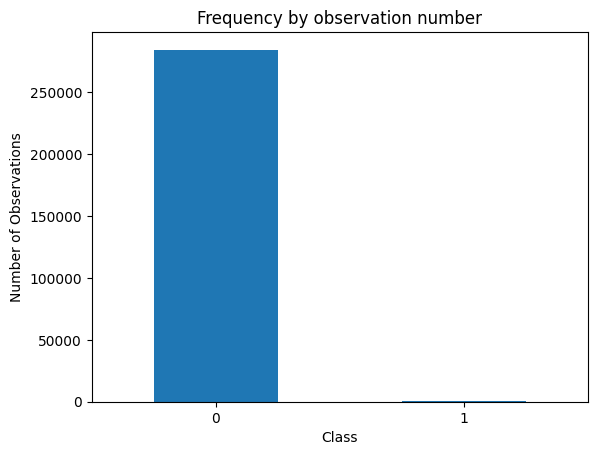

In [5]:
#Visualizing the imbalanced dataset
count_classes = pd.value_counts(dataset['Class'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.xticks(range(len(dataset['Class'].unique())), dataset.Class.unique())
plt.title("Frequency by observation number")
plt.xlabel("Class")
plt.ylabel("Number of Observations");

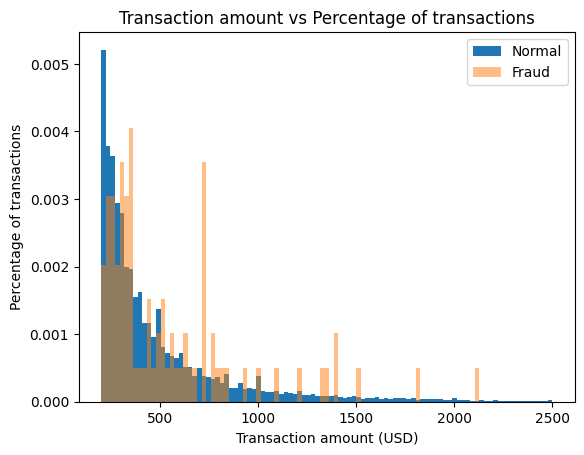

In [6]:
# Save the normal and fradulent transactions in separate dataframe
normal_dataset = dataset[dataset.Class == 0] 
fraud_dataset = dataset[dataset.Class == 1]
#Visualize transactionamounts for normal and fraudulent transactions
bins = np.linspace(200, 2500, 100) # Return evenly spaced numbers over a specified interval.
plt.hist(normal_dataset.Amount, bins=bins, alpha=1, density=True, label='Normal')
plt.hist(fraud_dataset.Amount, bins=bins, alpha=0.5, density=True, label='Fraud')
plt.legend(loc='upper right')
plt.title("Transaction amount vs Percentage of transactions")
plt.xlabel("Transaction amount (USD)")
plt.ylabel("Percentage of transactions");
plt.show()

In [7]:
'''Time and Amount are the columns that are not scaled, so applying StandardScaler to only Amount and Time columns. 
Normalizing the values between 0 and 1 did not work great for the dataset.'''

'Time and Amount are the columns that are not scaled, so applying StandardScaler to only Amount and Time columns. \nNormalizing the values between 0 and 1 did not work great for the dataset.'

In [8]:
sc=StandardScaler()
dataset['Time'] = sc.fit_transform(dataset['Time'].values.reshape(-1, 1))
dataset['Amount'] = sc.fit_transform(dataset['Amount'].values.reshape(-1, 1))

In [9]:
dataset['Amount']

0         0.244964
1        -0.342475
2         1.160686
3         0.140534
4        -0.073403
            ...   
284802   -0.350151
284803   -0.254117
284804   -0.081839
284805   -0.313249
284806    0.514355
Name: Amount, Length: 284807, dtype: float64

In [10]:
train_x, test_x = train_test_split(dataset, test_size=TEST_PCT, random_state=RANDOM_SEED)
train_x = train_x[train_x.Class == 0]       # where normal transactions
train_x = train_x.drop(['Class'], axis=1)   # drop the class column


test_y = test_x['Class']                    # save the class column for the test set
test_x = test_x.drop(['Class'], axis=1)     # drop the class column

train_x = train_x.values                    # transform to ndarray
test_x = test_x.values                      # transform to ndarray

#### Autoencoder Layer Structure and Parameters
Autoencoder has symmetric encoding and decoding layers that are "dense". We are reducing the input into some form of simplified encoding and then expanding it again. The input and output dimension is the feature space (e.g. 30 columns), so the encoding layer should be smaller by an amount that expect to represent some feature. In this case, I am encoding 30 columns into 14 dimensions so I am expecting high-level features to be represented by roughly two columns (30/14 = 2.1). Of those high-level features, I am expecting them to map to roughly seven hidden/latent features in the data.

Additionally, the epochs, batch size, learning rate, learning policy, and activation functions were all set to values empirically good values.

In [11]:
nb_epoch = 50
batch_size = 64
input_dim = train_x.shape[1] #num of columns, 30
encoding_dim = 14
hidden_dim_1 = int(encoding_dim / 2) #
hidden_dim_2=4  
learning_rate = 1e-7

In [12]:
#input Layer
input_layer = tf.keras.layers.Input(shape=(input_dim, ))

#Encoder
encoder = tf.keras.layers.Dense(encoding_dim, activation="tanh",                                
                        activity_regularizer=tf.keras.regularizers.l2(learning_rate))(input_layer)
# encoder=tf.keras.layers.Dropout(0.2)(encoder)
encoder = tf.keras.layers.Dense(hidden_dim_1, activation='relu')(encoder)
encoder = tf.keras.layers.Dense(hidden_dim_2, activation=tf.nn.leaky_relu)(encoder)

# Decoder
decoder = tf.keras.layers.Dense(hidden_dim_1, activation='relu')(encoder)
# decoder=tf.keras.layers.Dropout(0.2)(decoder)
decoder = tf.keras.layers.Dense(encoding_dim, activation='relu')(decoder)
decoder = tf.keras.layers.Dense(input_dim, activation='tanh')(decoder)

#Autoencoder
autoencoder = tf.keras.Model(inputs=input_layer, outputs=decoder)
autoencoder.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 30)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 14)                  │             434 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │             105 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 4)                   │              32 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 7)                   │              35 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 14)                  │             112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 30)                  │             450 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,168 (4.56 KB)

 Trainable params: 1,168 (4.56 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
"""Define the callbacks for checkpoints and early stopping"""

cp = tf.keras.callbacks.ModelCheckpoint(filepath="autoencoder_fraud.h5",
                               mode='min', monitor='val_loss', verbose=2, save_best_only=True)
# define our early stopping
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0.0001,
    patience=10,
    verbose=1, 
    mode='min',
    restore_best_weights=True)

In [14]:
#Compile the Autoencoder

autoencoder.compile(metrics=['accuracy'],
                    loss='mean_squared_error',
                    optimizer='adam')

In [15]:
#Train the Autoencoder

history = autoencoder.fit(train_x, train_x,
                    epochs=nb_epoch,
                    batch_size=batch_size,
                    shuffle=True,
                    validation_data=(test_x, test_x),
                    verbose=1,
                    callbacks=[cp, early_stop]
                    ).history


Epoch 1/50
3106/3110 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2272 - loss: 0.8901 
Epoch 1: val_loss improved from inf to 0.78525, saving model to autoencoder_fraud.h5


3110/3110 ━━━━━━━━━━━━━━━━━━━━ 16s 4ms/step - accuracy: 0.2273 - loss: 0.8900 - val_accuracy: 0.3766 - val_loss: 0.7852
Epoch 2/50
3101/3110 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3820 - loss: 0.7380
Epoch 2: val_loss improved from 0.78525 to 0.74628, saving model to autoencoder_fraud.h5


3110/3110 ━━━━━━━━━━━━━━━━━━━━ 16s 5ms/step - accuracy: 0.3820 - loss: 0.7380 - val_accuracy: 0.4153 - val_loss: 0.7463
Epoch 3/50
3095/3110 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4247 - loss: 0.7313
Epoch 3: val_loss improved from 0.74628 to 0.72676, saving model to autoencoder_fraud.h5


3110/3110 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.4247 - loss: 0.7311 - val_accuracy: 0.4314 - val_loss: 0.7268
Epoch 4/50
3100/3110 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4297 - loss: 0.6819 
Epoch 4: val_loss improved from 0.72676 to 0.71784, saving model to autoencoder_fraud.h5


3110/3110 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.4297 - loss: 0.6819 - val_accuracy: 0.4332 - val_loss: 0.7178
Epoch 5/50
3101/3110 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4324 - loss: 0.6758
Epoch 5: val_loss improved from 0.71784 to 0.71122, saving model to autoencoder_fraud.h5


3110/3110 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.4324 - loss: 0.6758 - val_accuracy: 0.4395 - val_loss: 0.7112
Epoch 6/50
3095/3110 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4379 - loss: 0.6614
Epoch 6: val_loss improved from 0.71122 to 0.70421, saving model to autoencoder_fraud.h5


3110/3110 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.4379 - loss: 0.6615 - val_accuracy: 0.4411 - val_loss: 0.7042
Epoch 7/50
3107/3110 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4383 - loss: 0.6462
Epoch 7: val_loss improved from 0.70421 to 0.69976, saving model to autoencoder_fraud.h5


3110/3110 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.4383 - loss: 0.6462 - val_accuracy: 0.4397 - val_loss: 0.6998
Epoch 8/50
3091/3110 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4413 - loss: 0.6829
Epoch 8: val_loss improved from 0.69976 to 0.69574, saving model to autoencoder_fraud.h5


3110/3110 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - accuracy: 0.4413 - loss: 0.6828 - val_accuracy: 0.4439 - val_loss: 0.6957
Epoch 9/50
3097/3110 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4409 - loss: 0.6669
Epoch 9: val_loss improved from 0.69574 to 0.69363, saving model to autoencoder_fraud.h5


3110/3110 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.4409 - loss: 0.6669 - val_accuracy: 0.4425 - val_loss: 0.6936
Epoch 10/50
3110/3110 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4410 - loss: 0.6341
Epoch 10: val_loss improved from 0.69363 to 0.69136, saving model to autoencoder_fraud.h5


3110/3110 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - accuracy: 0.4410 - loss: 0.6341 - val_accuracy: 0.4425 - val_loss: 0.6914
Epoch 11/50
3105/3110 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4413 - loss: 0.6568
Epoch 11: val_loss improved from 0.69136 to 0.68932, saving model to autoencoder_fraud.h5


3110/3110 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step - accuracy: 0.4413 - loss: 0.6568 - val_accuracy: 0.4445 - val_loss: 0.6893
Epoch 12/50
3110/3110 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4417 - loss: 0.6505
Epoch 12: val_loss did not improve from 0.68932
3110/3110 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step - accuracy: 0.4417 - loss: 0.6505 - val_accuracy: 0.4403 - val_loss: 0.6915
Epoch 13/50
3093/3110 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4401 - loss: 0.6502
Epoch 13: val_loss improved from 0.68932 to 0.68771, saving model to autoencoder_fraud.h5


3110/3110 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - accuracy: 0.4401 - loss: 0.6502 - val_accuracy: 0.4437 - val_loss: 0.6877
Epoch 14/50
3106/3110 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4412 - loss: 0.6607 
Epoch 14: val_loss improved from 0.68771 to 0.68684, saving model to autoencoder_fraud.h5


3110/3110 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.4412 - loss: 0.6607 - val_accuracy: 0.4455 - val_loss: 0.6868
Epoch 15/50
3099/3110 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4425 - loss: 0.6799 
Epoch 15: val_loss improved from 0.68684 to 0.68558, saving model to autoencoder_fraud.h5


3110/3110 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - accuracy: 0.4425 - loss: 0.6798 - val_accuracy: 0.4462 - val_loss: 0.6856
Epoch 16/50
3093/3110 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4422 - loss: 0.6450 
Epoch 16: val_loss improved from 0.68558 to 0.68554, saving model to autoencoder_fraud.h5


3110/3110 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.4422 - loss: 0.6450 - val_accuracy: 0.4482 - val_loss: 0.6855
Epoch 17/50
3105/3110 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4447 - loss: 0.6588
Epoch 17: val_loss improved from 0.68554 to 0.68533, saving model to autoencoder_fraud.h5


3110/3110 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.4447 - loss: 0.6587 - val_accuracy: 0.4469 - val_loss: 0.6853
Epoch 18/50
3096/3110 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4440 - loss: 0.6613
Epoch 18: val_loss improved from 0.68533 to 0.68393, saving model to autoencoder_fraud.h5


3110/3110 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - accuracy: 0.4440 - loss: 0.6613 - val_accuracy: 0.4482 - val_loss: 0.6839
Epoch 19/50
3094/3110 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4438 - loss: 0.6507 
Epoch 19: val_loss improved from 0.68393 to 0.68230, saving model to autoencoder_fraud.h5


3110/3110 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.4438 - loss: 0.6507 - val_accuracy: 0.4460 - val_loss: 0.6823
Epoch 20/50
3103/3110 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4447 - loss: 0.6680
Epoch 20: val_loss did not improve from 0.68230
3110/3110 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.4447 - loss: 0.6680 - val_accuracy: 0.4446 - val_loss: 0.6824
Epoch 21/50
3093/3110 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4440 - loss: 0.6466
Epoch 21: val_loss improved from 0.68230 to 0.68130, saving model to autoencoder_fraud.h5


3110/3110 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.4440 - loss: 0.6467 - val_accuracy: 0.4421 - val_loss: 0.6813
Epoch 22/50
3086/3110 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4406 - loss: 0.6659 
Epoch 22: val_loss improved from 0.68130 to 0.68083, saving model to autoencoder_fraud.h5


3110/3110 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.4407 - loss: 0.6657 - val_accuracy: 0.4416 - val_loss: 0.6808
Epoch 23/50
3097/3110 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4450 - loss: 0.6516
Epoch 23: val_loss improved from 0.68083 to 0.68014, saving model to autoencoder_fraud.h5


3110/3110 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.4450 - loss: 0.6515 - val_accuracy: 0.4453 - val_loss: 0.6801
Epoch 24/50
3095/3110 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4412 - loss: 0.6460
Epoch 24: val_loss improved from 0.68014 to 0.67910, saving model to autoencoder_fraud.h5


3110/3110 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - accuracy: 0.4412 - loss: 0.6460 - val_accuracy: 0.4455 - val_loss: 0.6791
Epoch 25/50
3099/3110 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4415 - loss: 0.6484
Epoch 25: val_loss did not improve from 0.67910
3110/3110 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.4415 - loss: 0.6484 - val_accuracy: 0.4480 - val_loss: 0.6792
Epoch 26/50
3106/3110 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4450 - loss: 0.6426
Epoch 26: val_loss improved from 0.67910 to 0.67862, saving model to autoencoder_fraud.h5


3110/3110 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.4450 - loss: 0.6426 - val_accuracy: 0.4460 - val_loss: 0.6786
Epoch 27/50
3086/3110 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4451 - loss: 0.6451 
Epoch 27: val_loss improved from 0.67862 to 0.67854, saving model to autoencoder_fraud.h5


3110/3110 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.4451 - loss: 0.6451 - val_accuracy: 0.4450 - val_loss: 0.6785
Epoch 28/50
3092/3110 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4432 - loss: 0.6417 
Epoch 28: val_loss improved from 0.67854 to 0.67695, saving model to autoencoder_fraud.h5


3110/3110 ━━━━━━━━━━━━━━━━━━━━ 15s 5ms/step - accuracy: 0.4432 - loss: 0.6417 - val_accuracy: 0.4438 - val_loss: 0.6770
Epoch 29/50
3102/3110 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4432 - loss: 0.6364 
Epoch 29: val_loss did not improve from 0.67695
3110/3110 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.4432 - loss: 0.6364 - val_accuracy: 0.4450 - val_loss: 0.6773
Epoch 30/50
3093/3110 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4457 - loss: 0.6379
Epoch 30: val_loss improved from 0.67695 to 0.67582, saving model to autoencoder_fraud.h5


3110/3110 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step - accuracy: 0.4457 - loss: 0.6380 - val_accuracy: 0.4456 - val_loss: 0.6758
Epoch 31/50
3108/3110 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4445 - loss: 0.6495  
Epoch 31: val_loss improved from 0.67582 to 0.67463, saving model to autoencoder_fraud.h5


3110/3110 ━━━━━━━━━━━━━━━━━━━━ 37s 12ms/step - accuracy: 0.4445 - loss: 0.6495 - val_accuracy: 0.4456 - val_loss: 0.6746
Epoch 32/50
3107/3110 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4439 - loss: 0.6449 
Epoch 32: val_loss improved from 0.67463 to 0.67423, saving model to autoencoder_fraud.h5


3110/3110 ━━━━━━━━━━━━━━━━━━━━ 30s 8ms/step - accuracy: 0.4439 - loss: 0.6449 - val_accuracy: 0.4434 - val_loss: 0.6742
Epoch 33/50
3103/3110 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4394 - loss: 0.6648 
Epoch 33: val_loss did not improve from 0.67423
3110/3110 ━━━━━━━━━━━━━━━━━━━━ 24s 8ms/step - accuracy: 0.4394 - loss: 0.6647 - val_accuracy: 0.4451 - val_loss: 0.6745
Epoch 34/50
3108/3110 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4429 - loss: 0.6459 
Epoch 34: val_loss improved from 0.67423 to 0.67292, saving model to autoencoder_fraud.h5


3110/3110 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.4429 - loss: 0.6459 - val_accuracy: 0.4447 - val_loss: 0.6729
Epoch 35/50
3105/3110 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4444 - loss: 0.6554 
Epoch 35: val_loss did not improve from 0.67292
3110/3110 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - accuracy: 0.4444 - loss: 0.6554 - val_accuracy: 0.4419 - val_loss: 0.6743
Epoch 36/50
3107/3110 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4415 - loss: 0.6486 
Epoch 36: val_loss did not improve from 0.67292
3110/3110 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - accuracy: 0.4415 - loss: 0.6486 - val_accuracy: 0.4420 - val_loss: 0.6740
Epoch 37/50
3104/3110 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4406 - loss: 0.6217 
Epoch 37: val_loss did not improve from 0.67292
3110/3110 ━━━━━━━━━━━━━━━━━━━━ 34s 11ms/step - accuracy: 0.4406 - loss: 0.6217 - val_accuracy: 0.4455 - val_loss: 0.6734
Epoch 38/50
3107/3110 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4442 - loss: 0.6382
Epoch 38: val_lo

3110/3110 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - accuracy: 0.4442 - loss: 0.6382 - val_accuracy: 0.4465 - val_loss: 0.6726
Epoch 39/50
3108/3110 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4448 - loss: 0.6302 
Epoch 39: val_loss improved from 0.67263 to 0.67222, saving model to autoencoder_fraud.h5


3110/3110 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - accuracy: 0.4448 - loss: 0.6302 - val_accuracy: 0.4436 - val_loss: 0.6722
Epoch 40/50
3109/3110 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4425 - loss: 0.6272 
Epoch 40: val_loss improved from 0.67222 to 0.67124, saving model to autoencoder_fraud.h5


3110/3110 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.4425 - loss: 0.6272 - val_accuracy: 0.4418 - val_loss: 0.6712
Epoch 41/50
3110/3110 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4431 - loss: 0.6307 
Epoch 41: val_loss did not improve from 0.67124
3110/3110 ━━━━━━━━━━━━━━━━━━━━ 44s 14ms/step - accuracy: 0.4431 - loss: 0.6307 - val_accuracy: 0.4452 - val_loss: 0.6718
Epoch 42/50
3101/3110 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4425 - loss: 0.6356 
Epoch 42: val_loss did not improve from 0.67124
3110/3110 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - accuracy: 0.4425 - loss: 0.6356 - val_accuracy: 0.4430 - val_loss: 0.6715
Epoch 43/50
3110/3110 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4427 - loss: 0.6469 
Epoch 43: val_loss did not improve from 0.67124
3110/3110 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.4427 - loss: 0.6469 - val_accuracy: 0.4409 - val_loss: 0.6716
Epoch 44/50
3105/3110 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4414 - loss: 0.6398 
Epoch 44: val_

3110/3110 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.4414 - loss: 0.6398 - val_accuracy: 0.4437 - val_loss: 0.6711
Epoch 45/50
3098/3110 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4417 - loss: 0.6510 
Epoch 45: val_loss improved from 0.67112 to 0.67084, saving model to autoencoder_fraud.h5


3110/3110 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.4417 - loss: 0.6510 - val_accuracy: 0.4455 - val_loss: 0.6708
Epoch 46/50
3101/3110 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4410 - loss: 0.6306 
Epoch 46: val_loss improved from 0.67084 to 0.67003, saving model to autoencoder_fraud.h5


3110/3110 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.4410 - loss: 0.6307 - val_accuracy: 0.4469 - val_loss: 0.6700
Epoch 47/50
3099/3110 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4445 - loss: 0.6491 
Epoch 47: val_loss did not improve from 0.67003
3110/3110 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.4445 - loss: 0.6491 - val_accuracy: 0.4465 - val_loss: 0.6706
Epoch 48/50
3102/3110 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4424 - loss: 0.6426 
Epoch 48: val_loss improved from 0.67003 to 0.66930, saving model to autoencoder_fraud.h5


3110/3110 ━━━━━━━━━━━━━━━━━━━━ 39s 13ms/step - accuracy: 0.4424 - loss: 0.6425 - val_accuracy: 0.4462 - val_loss: 0.6693
Epoch 49/50
3107/3110 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4434 - loss: 0.6474 
Epoch 49: val_loss did not improve from 0.66930
3110/3110 ━━━━━━━━━━━━━━━━━━━━ 37s 12ms/step - accuracy: 0.4434 - loss: 0.6474 - val_accuracy: 0.4477 - val_loss: 0.6705
Epoch 50/50
3105/3110 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4431 - loss: 0.6391 
Epoch 50: val_loss did not improve from 0.66930
3110/3110 ━━━━━━━━━━━━━━━━━━━━ 32s 10ms/step - accuracy: 0.4431 - loss: 0.6391 - val_accuracy: 0.4424 - val_loss: 0.6709
Restoring model weights from the end of the best epoch: 48.


Epoch 27/50
3107/3110 [============================>.] - ETA: 0s - loss: 0.6217 - accuracy: 0.4244
Epoch 27: val_loss did not improve from 0.65362
3110/3110 [==============================] - 7s 2ms/step - loss: 0.6218 - accuracy: 0.4243 - val_loss: 0.6539 - val_accuracy: 0.4239
Epoch 28/50
3103/3110 [============================>.] - ETA: 0s - loss: 0.6209 - accuracy: 0.4243
Epoch 28: val_loss improved from 0.65362 to 0.65312, saving model to autoencoder_fraud.h5
3110/3110 [==============================] - 8s 2ms/step - loss: 0.6210 - accuracy: 0.4242 - val_loss: 0.6531 - val_accuracy: 0.4232
Epoch 29/50
3084/3110 [============================>.] - ETA: 0s - loss: 0.6197 - accuracy: 0.4248
Epoch 29: val_loss improved from 0.65312 to 0.65224, saving model to autoencoder_fraud.h5
3110/3110 [==============================] - 7s 2ms/step - loss: 0.6203 - accuracy: 0.4247 - val_loss: 0.6522 - val_accuracy: 0.4231
Epoch 30/50
3105/3110 [============================>.] - ETA: 0s - loss: 0.6

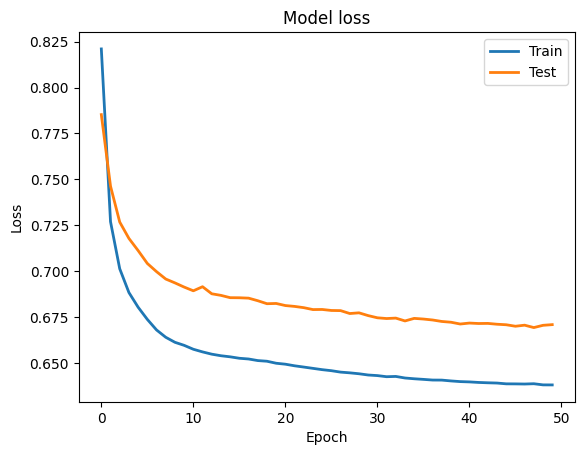

In [16]:
#Plot training and test loss

plt.plot(history['loss'], linewidth=2, label='Train')
plt.plot(history['val_loss'], linewidth=2, label='Test')
plt.legend(loc='upper right')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
#plt.ylim(ymin=0.70,ymax=1)
plt.show()

In [17]:
"""Detect Anomalies on test data

Anomalies are data points where the reconstruction loss is higher

To calculate the reconstruction loss on test data, 
predict the test data and calculate the mean square error between the test data and the reconstructed test data."""

test_x_predictions = autoencoder.predict(test_x)
mse = np.mean(np.power(test_x - test_x_predictions, 2), axis=1)
error_df = pd.DataFrame({'Reconstruction_error': mse,
                        'True_class': test_y})
error_df.describe()

2671/2671 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step 


,Reconstruction_error,True_class
count,85443.000000,85443.000000
mean,0.669245,0.001662
std,3.521273,0.040733
min,0.016789,0.000000
25%,0.174407,0.000000
50%,0.295930,0.000000
75%,0.512880,0.000000
max,293.642590,1.000000


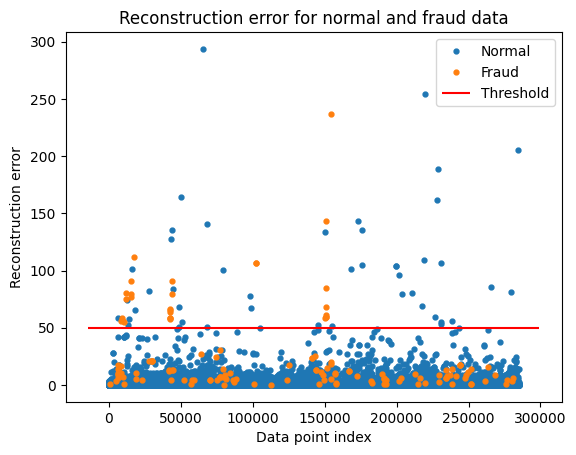

In [18]:
#Plotting the test data points and their respective reconstruction error sets a threshold value to visualize 
#if the threshold value needs to be adjusted.

threshold_fixed = 50
groups = error_df.groupby('True_class')
fig, ax = plt.subplots()
for name, group in groups:
    ax.plot(group.index, group.Reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Fraud" if name == 1 else "Normal")
ax.hlines(threshold_fixed, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for normal and fraud data")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

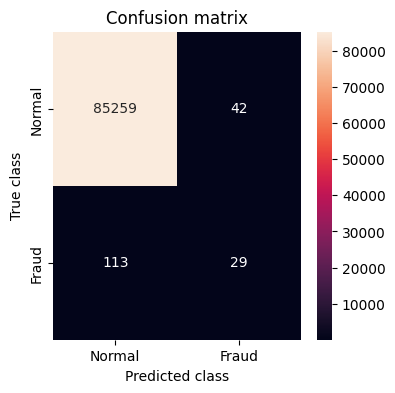

 Accuracy:  0.9981859251196704
 Recall:  0.20422535211267606
 Precision:  0.4084507042253521


In [20]:
'''Detect anomalies as points where the reconstruction loss is greater than a fixed threshold. 
Here we see that a value of 52 for the threshold will be good.

Evaluating the performance of the anomaly detection'''

import seaborn as sns
threshold_fixed =52
pred_y = [1 if e > threshold_fixed else 0 for e in error_df.Reconstruction_error.values]
error_df['pred'] =pred_y
conf_matrix = confusion_matrix(error_df.True_class, pred_y)
plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()
# print Accuracy, precision and recall
print(" Accuracy: ",accuracy_score(error_df['True_class'], error_df['pred']))
print(" Recall: ",recall_score(error_df['True_class'], error_df['pred']))
print(" Precision: ",precision_score(error_df['True_class'], error_df['pred']))